In [1]:
import os
import cv2
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load Sample Image

In [2]:
sample_img_1  = './DataSet/Train/DCM/1.dcm'
sample_mask_1 = './DataSet/Train/Label/1.png'

sample_img_2  = './DataSet/Train/DCM/30.dcm'
sample_mask_2 = './DataSet/Train/Label/30.png'

In [3]:
img_1 = sitk.ReadImage(sample_img_1)
img_arr_1 = sitk.GetArrayFromImage(img_1)[0]
mask_1 = cv2.imread(sample_mask_1, 0)

img_2 = sitk.ReadImage(sample_img_2)
img_arr_2 = sitk.GetArrayFromImage(img_2)[0]
mask_2 = cv2.imread(sample_mask_2, 0)

# Visualize Sample Image

In [4]:
def overlay_mask_on_img(img, mask):
    overlay_img = (img - img.min()) / (img.max() - img.min())
    overlay_img = (overlay_img * 255).astype(np.uint8)
    overlay_img = np.repeat(overlay_img[...,None], 3, -1)
    overlay_img[mask != 0] = [255,0,0]
    
    return overlay_img

In [5]:
overlay_img_1 = overlay_mask_on_img(img_arr_1, mask_1)
overlay_img_2 = overlay_mask_on_img(img_arr_2, mask_2)

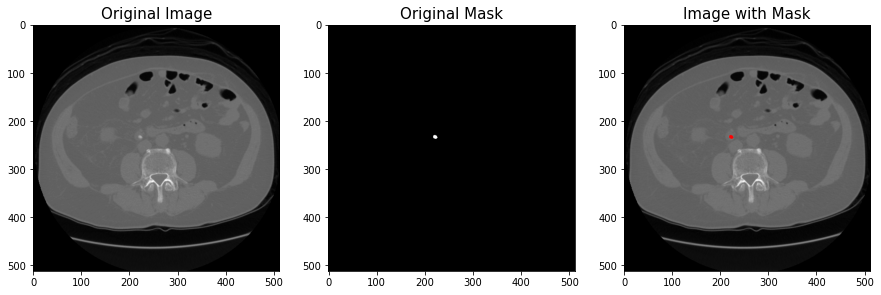

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_1, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(mask_1, 'gray')
axes[1].set_title("Original Mask", fontsize=15)

axes[2].imshow(overlay_img_1)
axes[2].set_title("Image with Mask", fontsize=15)

plt.show()

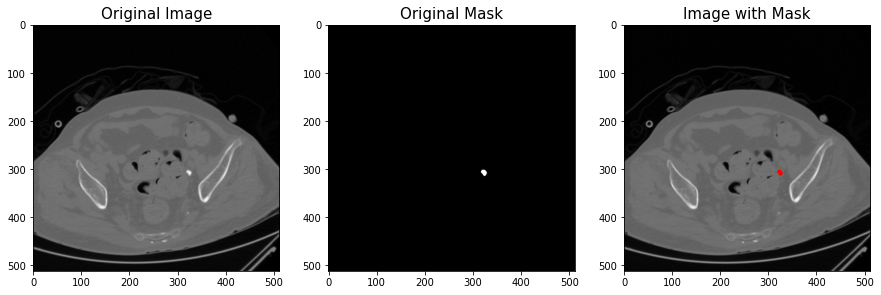

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_2, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(mask_2, 'gray')
axes[1].set_title("Original Mask", fontsize=15)

axes[2].imshow(overlay_img_2)
axes[2].set_title("Image with Mask", fontsize=15)

plt.show()

# HU Windowing

In [8]:
def image_windowing(img, w_min=400, w_max=600):
    img_w = img.copy()

    img_w[img_w < w_min] = w_min
    img_w[img_w > w_max] = w_max

    return img_w

In [9]:
img_w_1 = image_windowing(img_arr_1, 0, 300)
img_w_2 = image_windowing(img_arr_2, 0, 300)

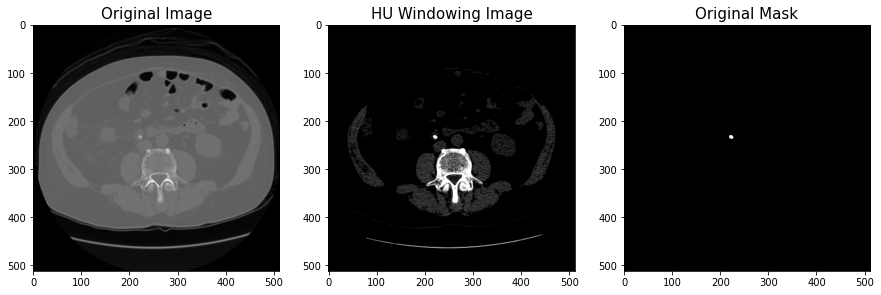

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_1, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(img_w_1, 'gray')
axes[1].set_title("HU Windowing Image", fontsize=15)

axes[2].imshow(mask_1, 'gray')
axes[2].set_title("Original Mask", fontsize=15)

plt.show()

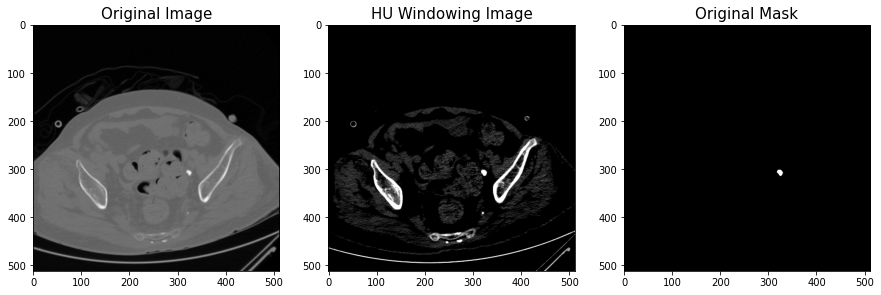

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_2, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(img_w_2, 'gray')
axes[1].set_title("HU Windowing Image", fontsize=15)

axes[2].imshow(mask_2, 'gray')
axes[2].set_title("Original Mask", fontsize=15)

plt.show()

In [12]:
from datasets.dataset import UrinaryStoneDataset

In [13]:
class Argument:
    def __init__(self):
        self.data_root = './DataSet'
        self.input_size = 224
        self.rot_factor =30
        self.scale_factor =0.15
        self.flip =True
        self.trans_factor=0.1
        
        self.w_min = 0
        self.w_max = 300

In [14]:
opt = Argument()

In [15]:
dset = UrinaryStoneDataset(opt, augmentation=True)

In [22]:
np.unique(mask_2)

array([ 0, 76], dtype=uint8)

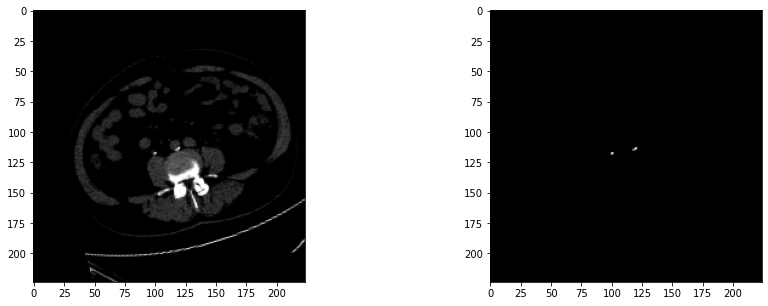

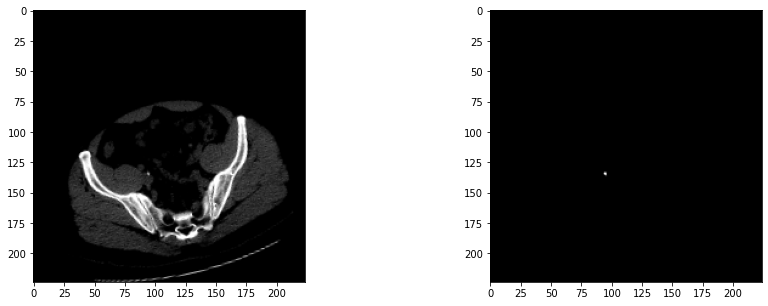

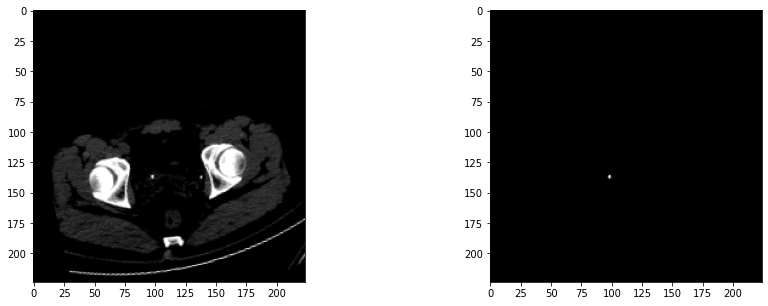

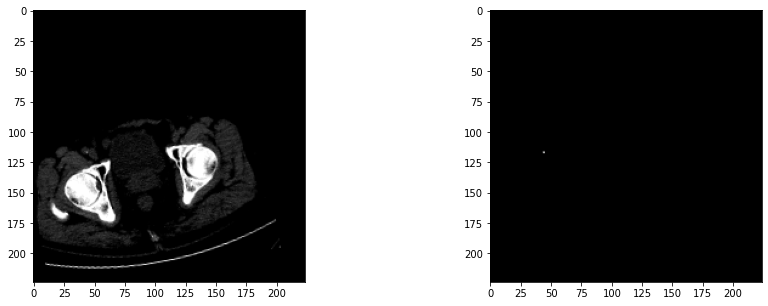

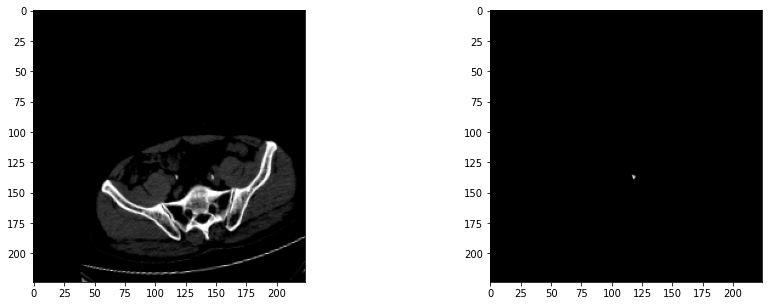

In [17]:
for i in range(0,50,10):
    img, mask = dset.__getitem__(i)

    fig, axes = plt.subplots(1, 2, figsize=(15,5))

    axes[0].imshow(img[0], 'gray')
    axes[1].imshow(mask[0], 'gray')
    plt.show()